# UFRJ / COPPE / Programa de Engenharia Eletrica
# CPE-723 – Otimizacao Natural (Parte II - Simulated Annealing)
# Lista de Exercicios #5
# Carlos Eduardo Covas Costa

In [12]:
import random
from random import randint
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import itertools
import datetime

## Lista 4 - 3)

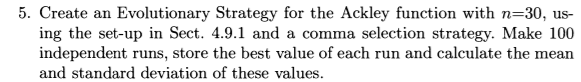

In [56]:
from IPython.display import Image
Image(filename='C:/Users/C00310965/Documents/livros/pictures/lista5/lista_quatro_treis.png')

In [29]:
def ackley(x):
    j = []
    row,column = x.shape
    n = column
    for r in range(row):
        somatorio1 = 0
        somatorio2 = 0
        for c in range(column):
            somatorio1 += x[r][c]**2
            somatorio2 += math.cos(2*math.pi*x[r][c])
        jr = -20*math.exp(-0.2*math.sqrt(somatorio1/n)) - math.exp(somatorio2/n) + 20 + math.exp(1)
        j.append(jr)
    return j
def mutation(x,sigma,epsilon):
    row,column = x.shape
    n = column
    tau_linha = float(1/math.sqrt(2*n))
    tau = float(1/math.sqrt(2*math.sqrt(n)))    
    x_linha = np.random.uniform(0,1,size=(row,column))    
    sigma_linha = np.random.uniform(0,1,size=(row,column))
    for r in range(row):
        normal = np.random.normal(0,1)
        for c in range(column):
            normal_i = np.random.normal(0,1)
            sigma_linha[r][c] = sigma[r][c]*math.exp((tau_linha*normal+tau*normal_i))
            if(sigma_linha[r][c] < epsilon):
                sigma_linha[r][c] = epsilon
            x_linha[r][c] = x[r][c] + sigma_linha[r][c]*normal_i
            if(x_linha[r][c] > 30):
                x_linha[r][c] = 30
            elif(x_linha[r][c] < -30):
                x_linha[r][c] = -30
    return x_linha,sigma_linha
def sigma_update_rule(ps,sigma,c): ###paper antigo, não será utilizado neste exerício
    if(ps > 0.2):
        sig = float(sig/c)
    elif(ps< 0.2):
        sig = sig*c
    else:
        sig = sig
    return sig
def initialise(n,populacao):
    x = np.random.uniform(0,1,size=(populacao,n))
    row,column = x.shape
    for r in range(row):
        for c in range(column):
            x[r][c] = np.random.uniform(-30,30)
    return x
def initialise_sigma(nsigma,populacao):
    x = np.random.uniform(0,1,size=(populacao,nsigma))
    row,column = x.shape
    for r in range(row):
        for c in range(column):
            x[r][c] = np.random.uniform(0,1)
    return x

In [33]:
rodadas = 10
geracoes = 1000
n = 30 #numero de dimensoes
nsigma = n
populacao = 30
mi = populacao
descendente_size = 200
epsilon = 10**(-8)
#parametro_c = 0.85
descendentes = np.random.uniform(0,1,size=(descendente_size,n))
descendentes_sigma = np.random.uniform(0,1,size=(descendente_size,nsigma))
xmin = []
jmin = []
init_time = datetime.datetime.now() 
for rodada in range(rodadas):
    j =[]
    x = initialise(n,populacao)
    sigma = initialise_sigma(nsigma,populacao)
    funcao = ackley(x)
    j.extend(funcao)
    #print(funcao)
    for k in range(geracoes):
        #print(k)
        #print(sigma)
        x,sigma = mutation(x,sigma,epsilon) #uncorrelated mutation with n step sizes
        #print('depois',sigma)
        for descendente in range(descendente_size):
            sort_combination = np.random.randint(len(list(itertools.combinations(range(populacao), 2))))
            pai1, pai2 = list(itertools.combinations(range(populacao), 2))[sort_combination] #sorteia dois pais aleatoriamente com probabilidade unfiforme dentre todas as combinacoes possíveis
            for dimensao in range(n): 
                if(np.random.uniform(0,1) < 0.5): #discrete recombination
                    pai = pai1
                else:
                    pai = pai2
                descendentes[descendente][dimensao] = x[pai][dimensao] 
                descendentes_sigma[descendente][dimensao] = float(sigma[pai1][dimensao] + sigma[pai2][dimensao])/2 #global intermediate recombination
        funcao = ackley(descendentes)
        #j.extend(funcao) #adiciona valores da funcao
        indexes = [i[0] for i in sorted(enumerate(funcao), key=lambda x:x[1])][:populacao] #retorna os index dos 30 menores valores em ordem
        i = 0
        for index in indexes: #atualiza a populacao com os descendentes que apresentaram os menores valores
            for dimensao in range(n):
                x[i][dimensao] = descendentes[index][dimensao]
                sigma[i][dimensao] = descendentes_sigma[index][dimensao]
            i = i+1
        funcao = ackley(x) #adiciona valores da funcao
        j.extend(funcao)
        #print(min(funcao))
    jmin.append(min(j))
total_time = datetime.datetime.now() - init_time
print('Algorithm took: '+str(total_time))
#print('x',x)
#print('sigma',sigma)
#print('funcao',funcao)
#print('J',j)
print('jmin',jmin)

Algorithm took: 0:06:26.098000
('jmin', [0.004984677727560172, 0.01082544272413033, 0.01577686493708841, 0.051238123417768566, 0.0032649608145942643, 0.35409769789012246, 0.6214292644244606, 0.10452790255460842, 0.03080120189985225, 0.003941421208765394])


In [34]:
print('ES')
print("Mean: "+str(np.mean(jmin))+" Standard Deviation: "+str(np.std(jmin)))

ES
Mean: 0.12008875576 Standard Deviation: 0.195515651787


## Lista5 -  1)

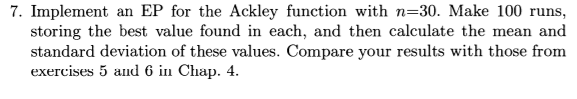

In [57]:
from IPython.display import Image
Image(filename='C:/Users/C00310965/Documents/livros/pictures/lista5/um.png')

In [2]:
def ackley(x):
    j = []
    row,column = x.shape
    n = column
    for r in range(row):
        somatorio1 = 0
        somatorio2 = 0
        for c in range(column):
            somatorio1 += x[r][c]**2
            somatorio2 += math.cos(2*math.pi*x[r][c])
        jr = -20*math.exp(-0.2*math.sqrt(somatorio1/n)) - math.exp(somatorio2/n) + 20 + math.exp(1)
        j.append(jr)
    return j

In [3]:
def mutation(x,sigma,epsilon,alfa):
    row,column = x.shape
    n = column
    tau_linha = float(1/math.sqrt(2*n))
    tau = float(1/math.sqrt(2*math.sqrt(n)))    
    x_linha = np.random.uniform(0,1,size=(row,column))    
    sigma_linha = np.random.uniform(0,1,size=(row,column))
    for r in range(row):
        normal = np.random.normal(0,1)
        for c in range(column):
            normal_i = np.random.normal(0,1)
            x_linha[r][c] = x[r][c] + sigma[r][c]*normal_i            
            #sigma_linha[r][c] = sigma[r][c]*math.exp((tau_linha*normal+tau*normal_i))
            sigma_linha[r][c] = sigma[r][c]*(1+alfa*normal)
            if(sigma_linha[r][c] < epsilon):
                sigma_linha[r][c] = epsilon
            if(x_linha[r][c] > 30):
                x_linha[r][c] = 30
            elif(x_linha[r][c] < -30):
                x_linha[r][c] = -30
    return x_linha,sigma_linha

In [4]:
def initialise(n,populacao):
    x = np.random.uniform(0,1,size=(populacao,n))
    row,column = x.shape
    for r in range(row):
        for c in range(column):
            x[r][c] = np.random.uniform(-30,30)
    return x

In [5]:
def initialise_sigma(nsigma,populacao):
    x = np.random.uniform(0,1,size=(populacao,nsigma))
    row,column = x.shape
    for r in range(row):
        for c in range(column):
            x[r][c] = np.random.uniform(6,6)
    return x

In [6]:
def torneio_em_rodizio(x,sigma,epsilon,alfa,q):
    descendentes,descendentes_sigma = mutation(x,sigma,epsilon,alfa) #uncorrelated mutation with n step sizes
    vitorias = []
    populacao_size,dimensoes_size = x.shape
    candidatos = np.vstack((x,descendentes))
    candidatos_sigma = np.vstack((sigma,descendentes_sigma))
    rows,columns = candidatos.shape
    for r in range(rows):
        wins = 0
        for i in range(q):
            adversario = np.random.randint(rows)
            if(ackley(np.atleast_2d(candidatos[r,:])) < ackley(np.atleast_2d(candidatos[adversario,:]))):
                wins = wins+1
        vitorias.append(wins)
    indexes = [i[0] for i in sorted(enumerate(vitorias), key=lambda x:x[1],reverse=True)][:populacao_size] #retorna os index dos n (n = tamanho da populacao) menores valores em ordem
    i = 0
    for index in indexes: #atualiza a populacao com os descendentes que apresentaram os mais vitórias
        for dimensao in range(dimensoes_size):
            x[i][dimensao] = candidatos[index][dimensao]
            sigma[i][dimensao] = candidatos_sigma[index][dimensao]
        i = i+1
    return x,sigma

In [24]:
rodadas = 10
geracoes = 1000
n = 30 #numero de dimensoes
nsigma = n
populacao = 200
mi = populacao
#descendente_size = 200
epsilon = 0.02
q = 10
alfa = 0.1
#parametro_c = 0.85
#descendentes = np.random.uniform(0,1,size=(descendente_size,n))
#descendentes_sigma = np.random.uniform(0,1,size=(descendente_size,nsigma))
jmin = []
init_time = datetime.datetime.now() 
for rodada in range(rodadas):
    j =[]
    x = initialise(n,populacao)
    sigma = initialise_sigma(nsigma,populacao)
    funcao = ackley(x)
    #j.extend(funcao)
    j.append(min(funcao))
    for k in range(geracoes):
        x,sigma = torneio_em_rodizio(x,sigma,epsilon,alfa,q) #a mutacao ocorre dentro desta funcao, assim como o torneio, tendo como output os vencedores (mi+mi)
        funcao = ackley(x) #adiciona valores da funcao
        #j.extend(funcao)
        j.append(min(funcao))
        #print(min(funcao))
    jmin.append(min(j))
total_time = datetime.datetime.now() - init_time
print('Algorithm took: '+str(total_time))
#print('x',x)
#print('sigma',sigma)
#print('funcao',funcao)
#print('J',j)
print('jmin',jmin)

Algorithm took: 1:20:44.786000
('jmin', [0.0717088672809223, 0.07389699175949405, 0.06244886654194248, 0.07099916162942366, 0.0667675326104491, 1.788047848617723, 0.06760936393405403, 0.07309878397514824, 0.07679535416208383, 0.07649912121129576])


In [30]:
print('EP')
print("Mean: "+str(np.mean(jmin))+" Standard Deviation: "+str(np.std(jmin)))

EP
Mean: 0.242787189172 Standard Deviation: 0.515104318492


Ambos os algoritmos ES e EP foram implementados conforme sugestão do livro em seus respectivos capítulos. Devido ao longo tempo de execução do algoritmo EP, provavelmente ocasionado por uma implantação não ótima, os valores foram comparados apenas para 10 gerações e não 100 como sugere o livro. O ES havia sido executado para 100 gerações na lista anterior, obtendo-se os valores abaixo:

Mean: 0.155960123964 Standard Deviation: 0.687587945796 Min:0.0005405597660907979 

Considerando apenas as 10 rodadas, o ES obteve, em média valores menores para a função Ackley e mais próximos do mínimo global, obtendo também um desvio padrão menor. Os valores do mínimo encontrado, média, desvio padrão, tempo de execução, bem como os valores de J para toda a população podem ser vistos abaixo para ambos os algoritmos, considerando as 10 rodadas.

### ES
#### Min: 0.0032649608145942643
#### Mean: 0.12008875576 
#### Standard Deviation: 0.195515651787
#### Algorithm took: 0:06:26.098000
#### ('jmin', [0.004984677727560172, 0.01082544272413033, 0.01577686493708841, 0.051238123417768566, 0.0032649608145942643, 0.35409769789012246, 0.6214292644244606, 0.10452790255460842, 0.03080120189985225, 0.003941421208765394])

### EP
#### Min: 0.06244886654194248
#### Mean: 0.242787189172 
#### Standard Deviation: 0.515104318492
#### Algorithm took: 1:20:44.786000
#### ('jmin', [0.0717088672809223, 0.07389699175949405, 0.06244886654194248, 0.07099916162942366, 0.0667675326104491, 1.788047848617723, 0.06760936393405403, 0.07309878397514824, 0.07679535416208383, 0.07649912121129576])

## 2) Consider using the number of generations as a measure to establish the speed of an EA. Compare the use of this measure with using the number of fitness evaluations.

As métricas número de gerações e número de avaliações da função aptidão podem ser usadas como métricas de eficiência ou velocidade de um algoritmo evolucionário, assim como o AES (Average Number of evaluations to a solution). A quantidade de avaliações da função custo é maior do que a quantidade de gerações ou iterações, pois em uma mesma iteração a função custo pode ser avaliada diversas vezes por conta de uma população com diversos indivíduos, por exemplo. Em casos onde o número de dimensões ou a quantidade de indivíduos é próximo de 1,  utilizar o número de gerações como métrica de velocidade pode ser uma boa alternativa, entretanto, quando temos um número relativamente alto de dimensões ou de indivíduos, bem como em casos em que o algoritmo avalia a função custo diversas vezes durante os processos envolvendo operações de variação ou mesmo antes de iniciar as iterações, o resultado de uma comparação utilizando a métrica número de gerações pode não ser justo, já que a convergência para um ótimo global pode acontecer em poucas gerações, mas com uma quantidade grande de avaliações da função. Sendo assim, cada avaliação de aptidão individual fornece algumas informações do problema. Portanto, é justo comparar dois algoritmos para o mesmo número de avaliações da aptidão, caso contrário, o algoritmo que possui um maior número de avaliações durante uma geração pode obter mais chances de fornecer melhores soluções, uma vez que obteve mais informações sobre o problema.

## 3) Give the arguments why mutation strength (e.g., pm or sigma) should be increased during a run. Give arguments why it should be decreased

Algoritmos de busca ou otimização devem garantir um balanceamento adequado entre uma busca para explocação que leve ao conhecimento do espaço de estados o máximo possível, conhecida como 'exploration', e uma busca concentrada em um ponto ótimo local (ou global), conhecida como 'exploitation'.  Em algoritmos evolucionários os operadores de mutação são utilizados em muitos casos para exploration, mas em alguns casos, como em Evolutionary Programming, onde não temos operadores de recombinação, estes também são utilizados para a fase de exploitation. Tais algoritmos demandam habilidades de exploitation ou exploration em diferentes estágios do processo de busca, e, por isso, é interessante que possuam a habilidade de se auto-adaptar conforme o estado de tal processo. Um operador de mutação deve aumentar seu valor durante uma rodada quando este estiver na fase de exploration e deve diminuir quando estiver no processo de exploitation. Sendo assim, no inicío do processo de busca, bem como em momentos em que o algoritmo parece estar preso a um mínimo local, é interessante o acréscido do valor de tal operador, enquanto em momentos onde haja a necessidade de uma busca mais refinada, como no final do processo de otimização/ busca, o valor do operador de mutação deve sofrer decréscimo. 

### 4) 

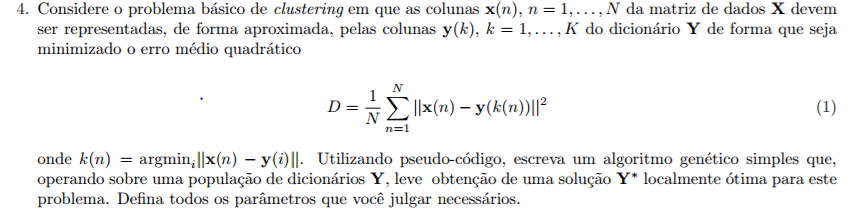

In [58]:
from IPython.display import Image
Image(filename='C:/Users/C00310965/Documents/livros/pictures/lista5/quatro.png')

O código foi escrito em Python. Entretanto, todas as linhas necessárias foram comentadas para facilitar a leitura em forma de pseudo-código.

In [ ]:
###inicializacao
geracoes = 100 ### número de gerações
tamanho_populacao = 100 ### tamanho da população
k = 8 ### numero de centroides
dim = 2 ### numero de dimensoes
N = 800 ###numero de pontos
prob_mate = 0.7


###MATRIZ de dados dim X N, inicializada com valores entre 0 e 30
x = np.random.uniform(0,1,size=(dim,N))  
row,column = x.shape
for r in range(row):
    for c in range(column):
        x[r][c] = np.random.uniform(0,30)

###População de 100 indivíduos, sendo cada indivíduo um dicionário representado por uma matriz Dim X K, onde Dim é o número de dimensões e k o número de centróides        
y = []  #lista composta por todos os 100 dicionáriros
for i in range(tamanho_populacao):
    dicionario = np.random.uniform(0,1,size=(dim,k))
    row,column = dicionario.shape
    for r in range(row):
        for c in range(column):
            dicionario[r][c] = np.random.uniform(0,30) #cada matriz de dicionários inicializada com valores entre 0 e 30
    y.append(dicionario) 

mate_size = tamanho_populacao ### número de pais a serem selecionados - geracional
mate_pool = [] #lista para os pais selecionados   

descendente_size = tamanho_populacao ### número de descendentes  - geracional
descendente1 = np.random.randint(0,1,size=(descendente_size,k))
descendente2 = np.random.randint(0,1,size=(descendente_size,k))
descendentes =[] #lista de descendentes

#função que avalia cada indivíduo
def erro_medio_quadratico(x,y):
    fitness = [] #lista composta pela aptidão de cada indivíduo
    for i in range(len(y)): #para cada indivíduo da população
        xrow,xcolumn = x.shape
        yrow,ycolumn = y[i].shape
        #encontra o cluster k(n) argmin ||x(n) − y(i)||
        for xc in range(xcolumn): #para cada columna (ponto) da matriz de dados
            centroide = [] #verifica a qual cluster esta coluna (ponto da matriz de dados) pertence
            cluster = 0
            dcluster = 999999
            for yc in range(ycolumn): #para cada coluna da matriz de dicionário, referente a um indivíduo
                d = 0 #distancia média quadrática do ponto até o centróide
                for xr in range(xrow):#para cada dimensao (coordenada)
                    d = d + (x[xr][xc] - y[xr][yc])**2 #calcula a distancia média quadrática do ponto até o centróide
                if(d < dcluster): ##verifica a qual cluster esta coluna (ponto da matriz de dados) pertence
                    dcluster = d
                    cluster = yc
            centroide.append(cluster) #aciona o cluster para a k para a coluna n
        ###calcula o erro médio quadrático
        mse = 0
        for xc in range(xcolumn): #para cada columna (ponto) da matriz de dados (somatório de 1 a N)
            for xr in range(xrow):#para cada dimensao (coordenada)
                cluster = centroide[xc]
                mse = mse + (x[xr][xc] - y[xr][cluster])**2 #calcula a distancia média quadrática do ponto até o centróide a qual tal ponto pertence
        mse = float(mse/xcolumn) #1/N
        fitness.append(mse)
    return fitness

#funcao que calcula probabilidade de seleção para ranking linear
def prob_linear(rank_position,s,populacao):
    p = float(2-s)/float(populacao) + float(2*rank_position*(s-1))/float(populacao*(populacao-1))
    return p 

for i in range(geracoes): #para cada geração
    fitness = erro_medio_quadratico(x,y) #avalia os indivíduos da população
    #selecao de pais
    avalia_rank=ss.rankdata(fitness)### cria um ranking do menor erro médio quadrático ao maior
    lista_ranking = avalia_rank.tolist()
    array_offset = np.empty(tamanho_populacao)
    array_offset.fill(tamanho_populacao)
    rank = array_offset-lista_ranking ###ranking varia de 0 até N-1, tendo o indivíduo com menor erro médio quadrático o maior valor no ranking
    p_lin = [] #calcula probabilidade linear
    for i in range(tamanho_populacao):
        p_lin.append(prob_linear(rank[i],2,tamanho_populacao)) #calcula probabilidade de seleção para ranking linear
    cumulativo = np.cumsum(p_lin) #calcula a soma cumulativa das probabilidades de seleção para ranking linear
    ###sorteia os pais baseado na soma cumulativa, implemetando-se assim o algoritmo Roulette Wheel
    for i in range(mate_size):
        r = np.random.random()
        j = 0
        while(cumulativo[j]<r):#algoritmo Roulette Wheel
            j = j+1
        for k in range(comprimento_string):
            mate_pool.append(y[j]) #adiciona os pai na lista de pais selecionados
    
    #recombinação
    for i in range(0,descendente_size,2):# para cada dois pais
        r = np.random.random()
        if(r < prob_mate): #recombina as matrizes de y dos pais com probabilidade 70% ou gera filhos identicos aos pais
            sep_index = np.random.randint(k) ###sorteia de 0 até k para realização de one-point crossover na matrizes
            for c1 in range(sep_index):
                for coordenada in range(dim):
                    descendente1[coordenada][c1] = mate_pool[i][coordenada][c1]
                    descendente2[coordenada][c1] = mate_pool[i+1][coordenada][c1]
            for c2 in range(sep_index,comprimento_string,1):
                for coordenada in range(dim):
                    descendente1[coordenada][c2] = mate_pool[i+1][coordenada][c2]
                    descendente2[coordenada][c2] = mate_pool[i][coordenada][c2]
        else:
            for j in range(N):
                for coordenada in range(dim)
                descendente1[coordenada][j] = mate_pool[i][coordenada][j]
                descendente2[coordenada][j] = mate_pool[i+1][coordenada][j]
        descendentes.append(desncendente1) #acrescenta o descendente1 criado na lista de descendentes
        descendentes.append(desncendente2) #acrescenta o descendente2 criado na lista de descendentes
    
    #mutação
    for i in range(descendente_size):# para cada descendente
        clusterk = np.random.randint(k) #sorteia um cluster
        row,column = descendentes[i].shape
        for r in range(row): #opera a mutação todas as dimensões do cluster com uma pertubação gaussiana de média 0 e variância 1
            descendesntes[i][r][clusterk] = descendesntes[i][r][clusterk] +  np.random.normal(0,1)  
    
    #Seleção de Sobreviventes
    y = descendentes #geracional, logo todos os filhos viram a nova população
